In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_columns = 20 
pd.options.display.max_rows = 35
path_arret = "F:/Stage/data/AFC/DM arret.txt"
path_mode =  "F:/Stage/data/AFC/DM mode.txt"
path_nature = "F:/Stage/data/AFC/DM nature.txt"
path_transporteur = "F:/Stage/data/AFC/DM transporteur.txt"
path_RER = "F:/Stage/data/AFC/RER_A"

In [4]:
def get_counts(anything):
    counts = {}
    for  a in anything:
        if a in counts:
            counts[a] = counts[a] + 1
        else:
            counts[a] = 1
    return counts

In [5]:
def transfer_time(data):
    hour,minute,second = data.split(':')
    hour = int(hour)*3600
    minute = int(minute)*60
    second = int(second)
    return hour+minute+second

In [6]:
def get_time_labels(sep):
    single_sep = sep/3600
    results = []
    this_time = 0
    while this_time <= 24:
        if this_time < 10:
            results.append('0{}:00:00'.format(int(this_time)))
        else:
            results.append('{}:00:00'.format(int(this_time)))
        this_time += single_sep
    return results
get_time_labels(7200)

['00:00:00',
 '02:00:00',
 '04:00:00',
 '06:00:00',
 '08:00:00',
 '10:00:00',
 '12:00:00',
 '14:00:00',
 '16:00:00',
 '18:00:00',
 '20:00:00',
 '22:00:00',
 '24:00:00']

In [8]:
RER = pd.read_csv(path_RER, delimiter="\t", header=0, encoding="latin-1")

E:\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
sort_RER = RER.sort_values('HEUR_VALD')

In [30]:
len(sort_RER)

1798529

In [10]:
sort_RER['Second'] = sort_RER['HEUR_VALD'].apply(transfer_time)

In [8]:
plot_data = [x for x in sort_RER.Second] 

#plt.savefig()

In [9]:
x_data = [x for x in sort_RER.HEUR_VALD]

In [17]:
plot_data[-1]

86399

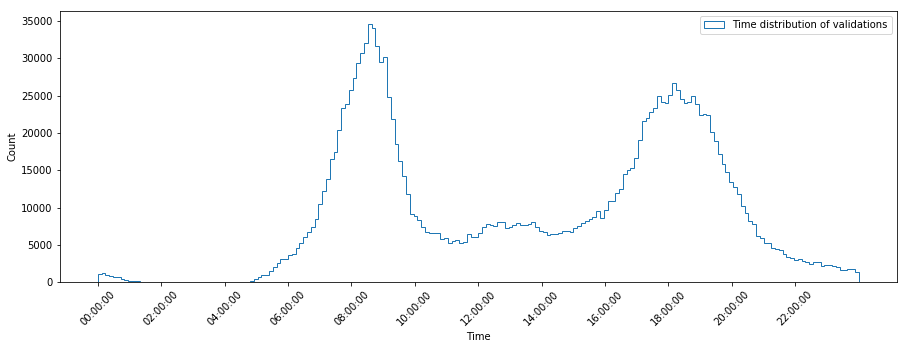

In [36]:
sep = 7200
plt.figure(figsize=(15,5))
plt.hist(plot_data,label='Time distribution of validations',histtype='step' ,bins=200)
plt.legend(loc='best')
plt.xlabel('Time')  
plt.ylabel('Count')
plt.xticks(np.arange(plot_data[0],plot_data[-1],sep),get_time_labels(sep),rotation = 45)
plt.savefig('E:/Study/images/Time_distribution')
plt.show()

In [38]:
print(plot_data[0],plot_data[-1])

86399/3600


0 86399


23.99972222222222

In [45]:
figure.index

<function tuple.index>

In [6]:
times= get_counts(sort_RER.HEUR_VALD)

In [11]:
sort_RER.HEUR_VALD

1212567    00:00:00
776735     00:00:00
162800     00:00:00
272924     00:00:00
695776     00:00:00
303458     00:00:01
831291     00:00:01
838871     00:00:02
954959     00:00:02
398430     00:00:02
505743     00:00:03
1310140    00:00:03
1411220    00:00:04
635237     00:00:05
754267     00:00:05
456710     00:00:05
363228     00:00:05
             ...   
678062     23:59:51
504261     23:59:51
58823      23:59:52
425499     23:59:52
53327      23:59:53
655797     23:59:53
736013     23:59:54
420542     23:59:54
155923     23:59:55
377143     23:59:56
32570      23:59:56
867575     23:59:57
802731     23:59:58
799556     23:59:58
745432     23:59:58
294561     23:59:59
1056229    23:59:59
Name: HEUR_VALD, Length: 1798529, dtype: object

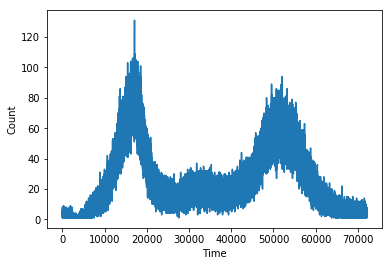

In [8]:
plt.plot(range(len(times)),times.values()) 
#plt.xticks(range(len(times)),times.keys(),rotation = 90)
plt.xlabel('Time')  
plt.ylabel('Count')
plt.legend()
plt.show()

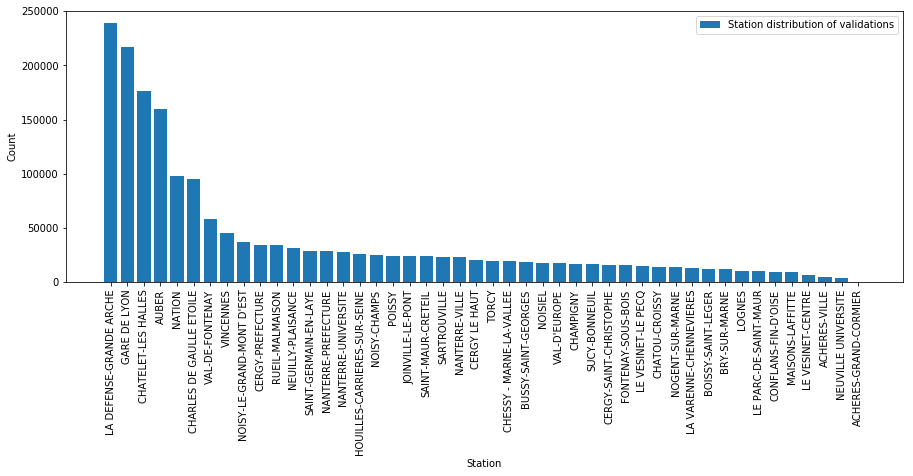

In [15]:
from operator import itemgetter
arrets = get_counts(sort_RER.Lib_Arret)
x = sorted(arrets.items(), key=itemgetter(1),reverse=True)
keys_stops = []
values_stops = []
for key,value in x:
    keys_stops.append(key)
    values_stops.append(value)
plt.figure(figsize=(15,5))
plt.bar(range(len(keys_stops)),values_stops,label = 'Station distribution of validations') 
plt.xlabel('Station')  
plt.ylabel('Count')
plt.legend(loc='best')
plt.xticks(range(len(keys_stops)), keys_stops, rotation = 90)
plt.savefig('E:/Study/images/Stations_bar')
plt.show()

In [16]:
arret_full = pd.DataFrame([i for i in arrets.values()],index = arrets.keys(), columns=['counts'])
arret_full

,counts
AUBER,159954
CHATELET-LES HALLES,176582
VAL-D'EUROPE,17376
CHAMPIGNY,17318
GARE DE LYON,216592
LE PARC-DE-SAINT-MAUR,9982
CHARLES DE GAULLE ETOILE,95358
NOISIEL,17695
BOISSY-SAINT-LEGER,12332
LA DEFENSE-GRANDE ARCHE,238737


In [34]:
sum(arret_full['counts'])

1798529

In [12]:
arret_dic = pd.read_csv(path_arret, delimiter="\t", header=0, encoding="latin-1")
arret_RER = (arret_dic[arret_dic['COD_STF_RES']=='801'])[['LIBL_LONG_ARRT_STTN','COOR_X_PHSQ','COOR_Y_PHSQ']]

In [13]:
arret_RER.index = arret_RER.LIBL_LONG_ARRT_STTN

In [17]:
arrtes_finall = arret_full.join(arret_RER)
arrtes_finall.drop_duplicates(keep="first", inplace = True)
arrtes_finall['COOR_X_PHSQ'] = arrtes_finall['COOR_X_PHSQ'].apply(lambda x: float((x.split(',')[0])))
arrtes_finall['COOR_Y_PHSQ'] = arrtes_finall['COOR_Y_PHSQ'].apply(lambda x: float((x.split(',')[0])))
arrtes_finall

,counts,LIBL_LONG_ARRT_STTN,COOR_X_PHSQ,COOR_Y_PHSQ
ACHERES-GRAND-CORMIER,38,ACHERES-GRAND-CORMIER,582204.0,139475.0
ACHERES-VILLE,4817,ACHERES-VILLE,581054.0,141176.0
AUBER,159954,AUBER,599516.0,130190.0
BOISSY-SAINT-LEGER,12332,BOISSY-SAINT-LEGER,612355.0,116862.0
BRY-SUR-MARNE,12154,BRY-SUR-MARNE,613900.0,127176.0
BUSSY-SAINT-GEORGES,18526,BUSSY-SAINT-GEORGES,627340.0,126296.0
CERGY LE HAUT,20895,CERGY LE HAUT,576206.0,149781.0
CERGY-PREFECTURE,34570,CERGY-PREFECTURE,581211.0,148493.0
CERGY-SAINT-CHRISTOPHE,16385,CERGY-SAINT-CHRISTOPHE,577909.0,149971.0
CHAMPIGNY,17318,CHAMPIGNY,612764.0,122957.0


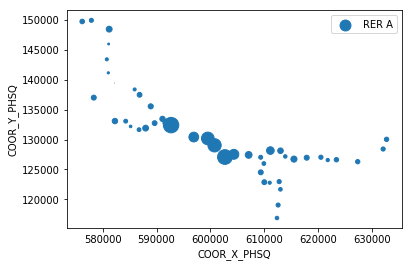

In [18]:
arrtes_finall.plot(kind="scatter", x="COOR_X_PHSQ", y = "COOR_Y_PHSQ", s = arrtes_finall["counts"]/1000, label = 'RER A')
plt.legend(loc='best')
plt.savefig('E:/Study/images/RER_A_24')
plt.show()

In [35]:
get_counts(sort_RER.COD_NATR_VALD)
sort_RER['COD_NATR_VALD'] = sort_RER['COD_NATR_VALD'].astype('str')
sort_RER['HEUR_VALD'] = pd.to_datetime(sort_RER['HEUR_VALD'], format='%H:%M:%S')
get_counts(sort_RER.COD_NATR_VALD)

{'01 ': 25743,
 '02 ': 18998,
 '031': 10477,
 '051': 103776,
 '052': 100876,
 '056': 27251,
 '057': 25977,
 '1': 69636,
 '2': 58606,
 '31': 31094,
 '51': 475358,
 '52': 450292,
 '56': 189412,
 '57': 210997,
 'ND ': 36}

In [36]:
dic_nature = get_counts(sort_RER.COD_NATR_VALD)

In [37]:
dic_nature

{'01 ': 25743,
 '02 ': 18998,
 '031': 10477,
 '051': 103776,
 '052': 100876,
 '056': 27251,
 '057': 25977,
 '1': 69636,
 '2': 58606,
 '31': 31094,
 '51': 475358,
 '52': 450292,
 '56': 189412,
 '57': 210997,
 'ND ': 36}

In [53]:
print(sum([95379,41571,579134,216663]))
print(sum([77604,551168,236974]))

932747
865746


In [48]:
dic_final_nature = {'Entrée': 95379, 'Sortie': 77604, 
                    'Entrée métro':41571, 'Entrée RER':579134,'Sortie RER':551168,'Entrée Correspondance RER':216663,
                   'Sortie correspondance RER':236974}

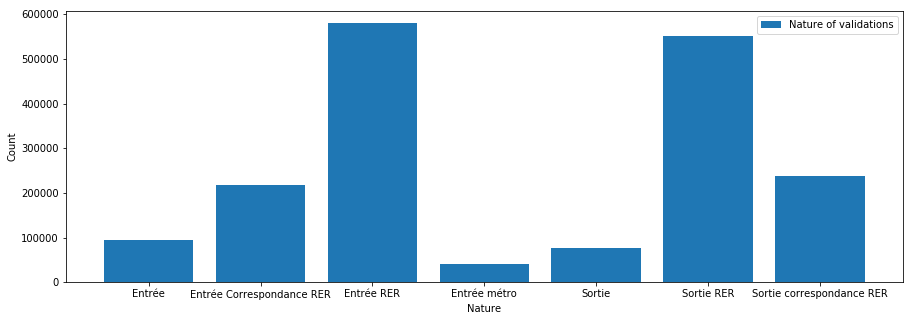

In [49]:
plt.figure(figsize=(15,5))
plt.bar(dic_final_nature.keys(),dic_final_nature.values(),label = 'Nature of validations') 
plt.xlabel('Nature')  
plt.ylabel('Count')
plt.legend(loc='best')
#plt.xticks(range(len(keys_stops)), keys_stops, rotation = 90)
plt.savefig('E:/Study/images/Nature_bar')
plt.show()

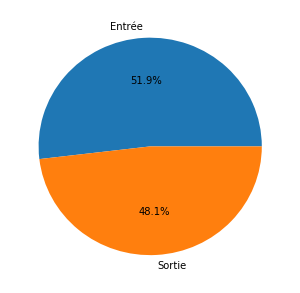

In [56]:
plt.figure(figsize=(5,5))
plt.pie([932747,865746],labels=['Entrée','Sortie'],autopct='%1.1f%%')
#plt.legend(loc='best')
plt.savefig('E:/Study/images/Nature_pie')
plt.show()

In [19]:
nature = pd.read_csv(path_nature, header=0 , delimiter="\t", encoding="latin-1")
nature

,COD_NATR_VALD,COD_ENTR_SORT,LIBL_NATR_VALD,COD_MOD,COD_NATR_VALD_AGRG
0,3,3,Entree Correspondance,1,3
1,05A,1,Entree RER,1,2
2,057,3,Sortie Correspondance RER,3,5
3,17,1,Entree Bus,2,1
4,23,3,Sortie Correspondance RER,3,5
5,041,1,entree Tramway,4,7
6,05B,2,Sortie RER,1,4
7,02,2,Sortie,1,4
8,16,3,Correspondance Bus,2,1
9,01,1,Entree,-1,10


In [20]:
entree = ['01 ', '031', '051', '056', '1', '31', '51', '56']
sortie = ['02 ', '052', '057', '2', '52', '57']

In [21]:
entree_nature = nature[nature['COD_NATR_VALD'].isin(entree)]
entree_nature

,COD_NATR_VALD,COD_ENTR_SORT,LIBL_NATR_VALD,COD_MOD,COD_NATR_VALD_AGRG
9,01,1,Entree,-1,10
19,031,1,entree Metro,3,6
21,056,3,Entree Correspondance RER,1,3
29,051,1,Entree RER,1,2


In [22]:
sortie_nature = nature[nature['COD_NATR_VALD'].isin(sortie)]
sortie_nature

,COD_NATR_VALD,COD_ENTR_SORT,LIBL_NATR_VALD,COD_MOD,COD_NATR_VALD_AGRG
2,057,3,Sortie Correspondance RER,3,5
7,02,2,Sortie,1,4
26,052,2,Sortie RER,1,4


In [38]:
sort_RER = sort_RER.reset_index(drop=True)

In [39]:
sort_RER['HEUR_VALD'][100]
pd.Timestamp('19000101 15:23:23')

Timestamp('1900-01-01 15:23:23')

In [25]:
def select_time(start_time, end_time, data):
    year = '19000101 '
    start = pd.Timestamp(year+start_time)
    end = pd.Timestamp(year + end_time)
    new_data = data[(data['HEUR_VALD'] > start) & (data['HEUR_VALD'] < end) ]
    return new_data

In [50]:
sort_RER_entree =  sort_RER.query('COD_NATR_VALD == "057"|COD_NATR_VALD == "056"|COD_NATR_VALD == "01 "|COD_NATR_VALD == "031"|COD_NATR_VALD == "1"|COD_NATR_VALD == "31"|COD_NATR_VALD == "51"|COD_NATR_VALD == "56"')
len(sort_RER_entree)

854948

In [51]:
sort_RER_sortie =  sort_RER.query('COD_NATR_VALD == "02 "|COD_NATR_VALD == "052"|COD_NATR_VALD == "057"|COD_NATR_VALD == "2"|COD_NATR_VALD == "52"|COD_NATR_VALD == "57"')
len(sort_RER_sortie)

865746

In [52]:
index = get_counts(sort_RER_entree['Lib_Arret']).keys()
len(index)



46

In [55]:
def OD_matrix(start_time, end_time, stop):
    new_data = select_time(start_time,end_time,sort_RER_entree)
    new_data = new_data[new_data['Lib_Arret'] == stop]
    print(len(new_data))
    final_data =select_time(start_time,end_time,sort_RER_sortie)
    final_data = final_data[final_data['NUMR_CART'].isin(new_data['NUMR_CART'])]
    print(len(final_data))
    counts = get_counts(final_data['Lib_Arret'])
    del counts[stop]
    return pd.DataFrame([i for i in counts.values()], index = counts.keys(), columns = [stop])

In [56]:
OD = OD_matrix('11:30:00', '12:40:00', 'GARE DE LYON')
OD

4110
2100


,GARE DE LYON
NATION,73
CHATELET-LES HALLES,111
NEUILLY-PLAISANCE,15
VINCENNES,36
VAL-DE-FONTENAY,37
AUBER,71
CHARLES DE GAULLE ETOILE,74
NOGENT-SUR-MARNE,10
LA DEFENSE-GRANDE ARCHE,110
NANTERRE-PREFECTURE,14


In [57]:
OD_7 = OD_matrix('07:00:00', '09:00:00', 'GARE DE LYON')
OD_9 = OD_matrix('09:00:00', '11:00:00', 'GARE DE LYON')
OD_11 = OD_matrix('11:00:00', '13:00:00', 'GARE DE LYON')
OD_13 = OD_matrix('13:00:00', '15:00:00', 'GARE DE LYON')
OD_15 = OD_matrix('15:00:00', '17:00:00', 'GARE DE LYON')
OD_17 = OD_matrix('17:00:00', '19:00:00', 'GARE DE LYON')
OD_19 = OD_matrix('19:00:00', '21:00:00', 'GARE DE LYON')

20829
12850
9911
6726
6591
3686
7760
4226
13306
5894
29797
14084
15207
9414


In [58]:
OD_all = [OD_7, OD_9, OD_11, OD_13, OD_15, OD_17, OD_19]
labels = ['07:00:00 - 09:00:00', '09:00:00 - 11:00:00', '11:00:00 - 13:00:00', '13:00:00 - 15:00:00', 
'15:00:00 - 17:00:00', '17:00:00 - 19:00:00', '19:00:00 - 21:00:00']

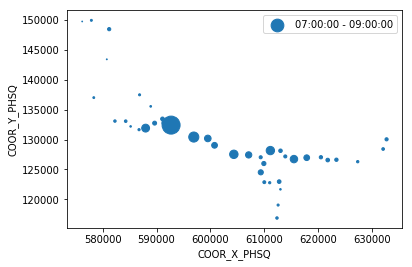

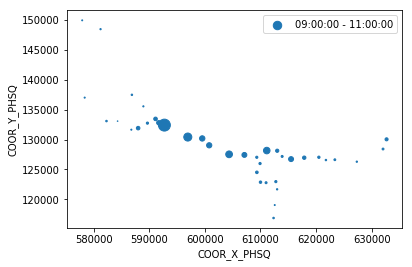

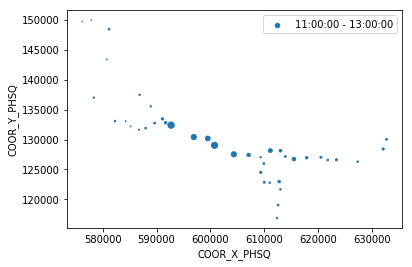

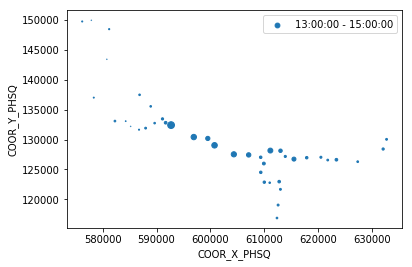

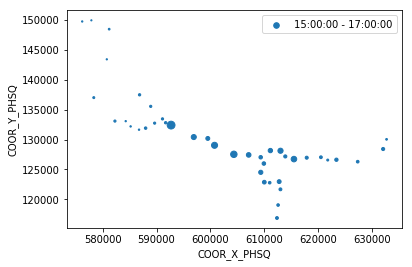

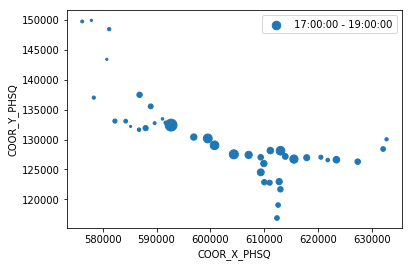

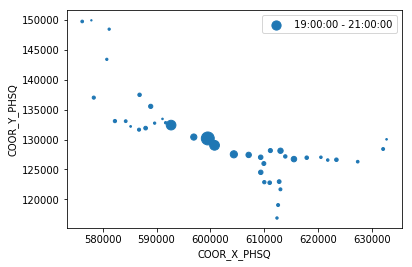

In [59]:
for  i in range(len(OD_all)):
    RER_finall = OD_all[i].join(arret_RER)
    RER_finall.drop_duplicates(keep="first", inplace = True)
    RER_finall['COOR_X_PHSQ'] = RER_finall['COOR_X_PHSQ'].apply(lambda x: float((x.split(',')[0])))
    RER_finall['COOR_Y_PHSQ'] = RER_finall['COOR_Y_PHSQ'].apply(lambda x: float((x.split(',')[0])))
    RER_finall.plot(kind="scatter", x="COOR_X_PHSQ", y = "COOR_Y_PHSQ", s = RER_finall["GARE DE LYON"]/5, label = labels[i] )
plt.show()


In [55]:
try_path = 'F:/Stage/data/AFC/parts/part_21.txt'
try_test = pd.read_csv(try_path, header = 0, delimiter="\t", encoding="latin-1")
try_test

E:\python\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,NUMR_CART,JOUR_EXPL_VALD,HEUR_VALD,Lib_Arret,COD_TLB_TRNS,COD_TLB_RES,COD_TLB_ARRT_STTN,NUMR_BORN_VALD_EQPM,COD_NATR_VALD,COD_MOD_VALD,COD_STF_TRNS,COD_STF_RES,COD_STF_LIGN
0,10000000,89832956454731526754,14/03/2017,13:11:00,Village Cargo,100,193,18632,20652,11,2,293,193,100
1,10000001,39846463822337477583,14/03/2017,20:41:16,SAINT-AUGUSTIN,3,001,0030030061000,104,031,3,100,110,ND
2,10000002,20346703473675496051,14/03/2017,19:29:00,PASTEUR,3,001,0030010128035,1394,011,2,100,100,128
3,10000003,60728665230456429532,14/03/2017,13:04:20,SAINT-DENIS,2,002,271015,4500505,01,1,800,853,ND
4,10000004,60983309814606353688,14/03/2017,17:06:18,LIBERTE,3,001,0030030251200,102,031,3,100,110,ND
5,10000005,27957983567479680899,14/03/2017,13:29:48,TERNES - MAC MAHON,3,001,0030010043049,10459,011,2,100,100,43
6,10000006,82750756490689875739,14/03/2017,09:39:03,MAISONS-ALFORT-STADE,3,001,0030030251500,103,031,3,100,110,ND
7,10000007,29676361871665297436,14/03/2017,14:53:22,BOBIGNY-PANTIN (RAYMOND QUENEAU),3,001,0030030031100,103,031,3,100,110,ND
8,10000008,90303180079144330252,14/03/2017,19:22:12,Inconnu,3,001,*112,18461,041,4,100,112,3
9,10000009,29749837935098674468,14/03/2017,20:36:52,PORTE DE PANTIN,3,001,0030030220100,104,031,3,100,110,ND


In [56]:
x = try_test[try_test['Lib_Arret']=='GARE DE LYON']
flag = True
get_counts(x['COD_TLB_RES'])

{'001': 2722, 1: 258}

In [62]:
path_arret = "F:/Stage/data/AFC/DM arret.txt"
arret = pd.read_csv(path_arret, header = 0, delimiter="\t", encoding="latin-1")
arret[(arret['LIBL_LONG_ARRT_STTN'] == 'NATION') ]

,COD_TLB_RES,COD_TLB_TRNS,COD_TLB_ARRT_STTN,COD_STF_RES,COD_STF_TRNS,COD_STF_ARRT_STTN,ZONS_ARRT,COD_ZON_PHSQ_MIN,DAT_DEBT_VALD_ZON_PHSQ_MIN,COD_INS_COMM,...,COD_ZON_PHSQ_MAX,DAT_DEBT_VALD_ZON_PHSQ_MAX,LIBL_COUR_ARRT_STTN,LIBL_LONG_ARRT_STTN,POL_PDU,COOR_X_PHSQ,COOR_Y_PHSQ,CORR_DONN_STF,MOD_BUS,MOD_RER
9177,001,3,0030010711056,987,100,0030010711056,1,1,01/01/2006,75111,...,1,01/01/2006,NATION,NATION,0,"604385,447126423","127604,078484772",O,1,0
19756,001,3,0030010057008,100,100,0030010057008,1,1,01/01/2006,75111,...,1,01/01/2006,NATION - TAILL,NATION,0,"604385,447126423","127604,078484772",O,1,0
25898,001,3,0030030051000,110,100,583,1,1,01/01/2006,75111,...,1,01/01/2006,NATION,NATION,0,"604332,264","127458,575",O,0,0
31969,001,3,0030010733074,987,100,0030010733074,1,1,01/01/2006,75111,...,1,01/01/2006,NATION,NATION,0,"604422,426955433","127563,103548843",O,1,0
42049,001,3,0030010733005,987,100,0030010733005,1,1,01/01/2006,75111,...,1,01/01/2006,NATION,NATION,0,"604385,447126423","127604,078484772",O,1,0
72531,801,1,0030050160101,801,810,582,1,1,01/01/2006,75111,...,1,01/01/2006,NATION,NATION,0,"604351,955","127531,732",O,0,1
